Input images/test.jpg


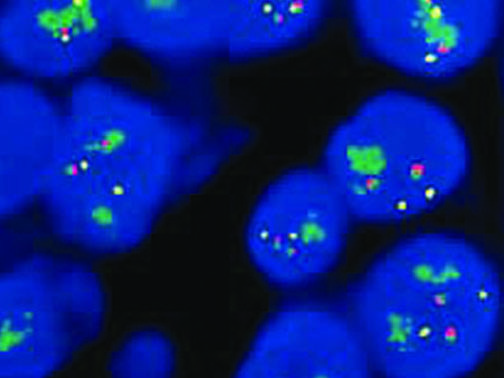

In [25]:
from IPython.display import Image
print('Input images/test.jpg')
Image(filename='images/test.jpg')

In [37]:

import colorsys

try:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d.axes3d import Axes3D
    from PIL import Image
    %matplotlib inline
except ImportError:
    print('To run this notebook install matplotlib, and Pillow for python3')
    


def rgb_spectrum(img, fname=None):
    """
    Create a multi-valued HSV Spectrum from an RGB

    Parameters:
    img - an opem image file of type PIL Image.Image
    fname - optional output file name for saving the spectrial image produced

    Return:
    matplotlib.pyplot Object
    """
    if isinstance(img, Image.Image):
        # (2) Construct a blank matrix representing the pixels in the image
        print('Processing the image')
        xs, ys = img.size
        max_intensity = 100
        hues = {}
        pixel_access = img.load()

        # (3) Examine each pixel in the image file
        for x in range(0, xs):
            for y in range(0, ys):
                # ( )  Get the RGB color of the pixels
                [r, g, b, _] = pixel_access[x, y]

                # ( )  Normalize pixel color values
                r /= 255.0
                g /= 255.0
                b /= 255.0

                # ( )  Convert RGB color to HSV
                [h, s, v] = colorsys.rgb_to_hsv(r, g, b)

                if h not in hues:
                    hues[h] = {}
                if v not in hues[h]:
                    hues[h][v] = 1
                else:
                    if hues[h][v] < max_intensity:
                        hues[h][v] += 1

        # ( )   Decompose the hues tree into a set of dimensional arrays
        h_ = []
        v_ = []
        i = []
        colours = []

        for h in hues:
            for v in hues[h]:
                h_.append(h)
                v_.append(v)
                i.append(hues[h][v])
                [r, g, b] = colorsys.hsv_to_rgb(h, 1, v)
                colours.append([r, g, b])

        # ( )   Plot the graph!
        fig, ax = plt.subplots()
        ax = Axes3D(fig)
        ax.scatter(h_, v_, i, s=5, c=colours, lw=0)

        ax.set_xlabel('Hue')
        ax.set_ylabel('Value')
        ax.set_zlabel('Intensity')
        ax.set_title('Multi-value Spectrum')
        return plt


def main():
    filename = input('image file name: ')
    print('Reading image: {}'.format(filename))

    # (1) Import the file to be analyzed
    image_file = Image.open(filename)

    plot = rgb_spectrum(image_file)
    

image file name: images/test.jpg
Reading image: images/test.jpg
Processing the image


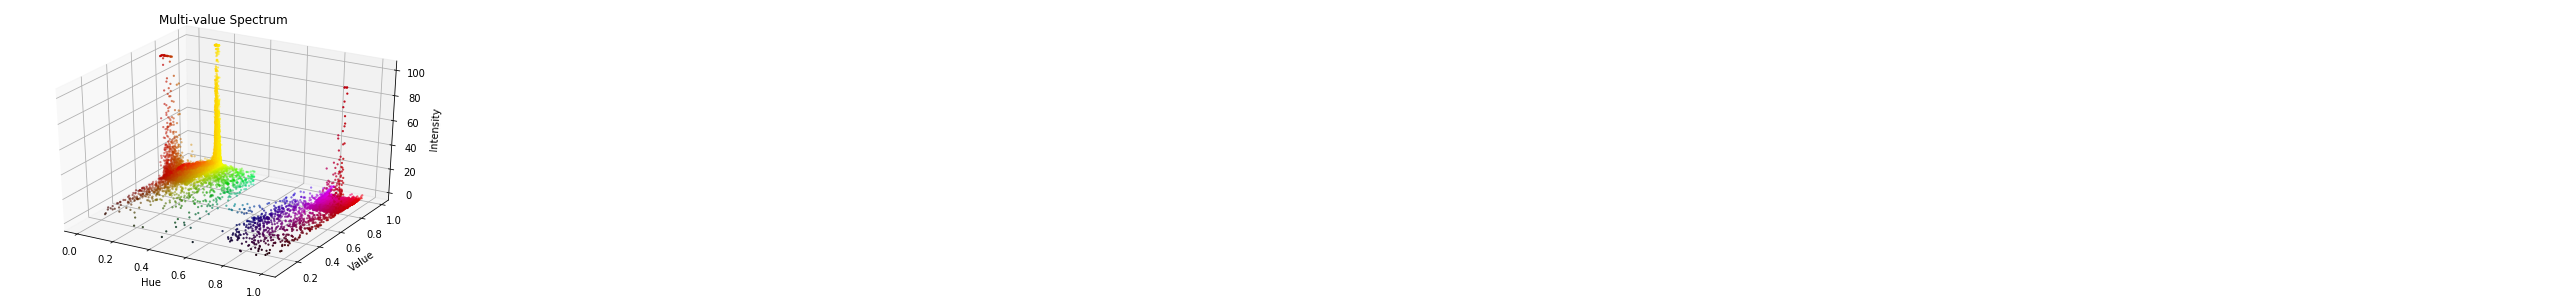

In [39]:
main()